In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\002\JP\infosys\diabetes_prediction_dataset.csv")

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Exploratory Data Analysis

In [5]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [6]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
if duplicate_rows > 0:
    df = df.drop_duplicates()
    print(f"Shape after removing duplicates: {df.shape}")

duplicate_columns = df.columns[df.columns.duplicated()]
print(f"Duplicate columns: {list(duplicate_columns)}")

Number of duplicate rows: 3854
Shape after removing duplicates: (96146, 9)
Duplicate columns: []


In [7]:
print(df['diabetes'].value_counts(normalize=True) * 100)

diabetes
0    91.178
1     8.822
Name: proportion, dtype: float64


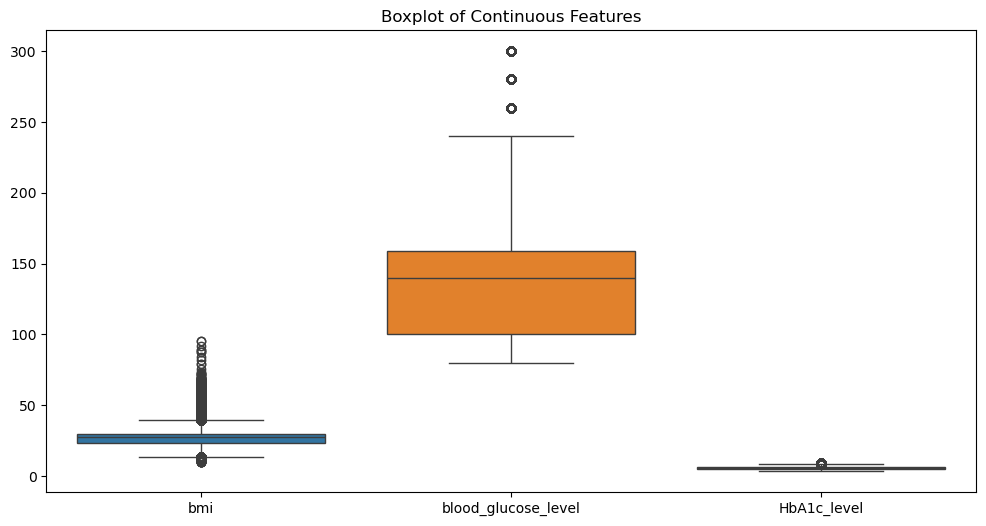

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['bmi', 'blood_glucose_level', 'HbA1c_level']])
plt.title("Boxplot of Continuous Features")
plt.show()

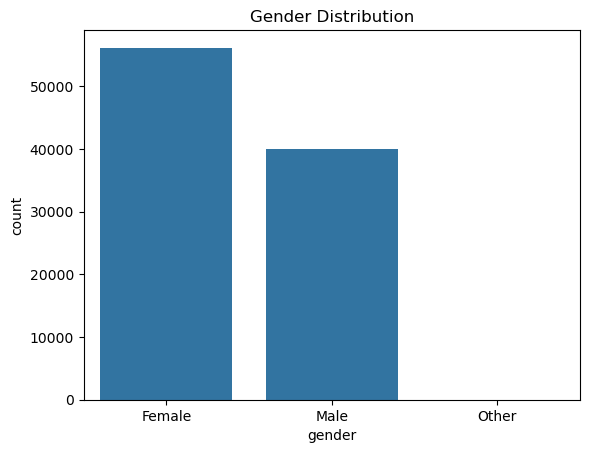

In [9]:
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

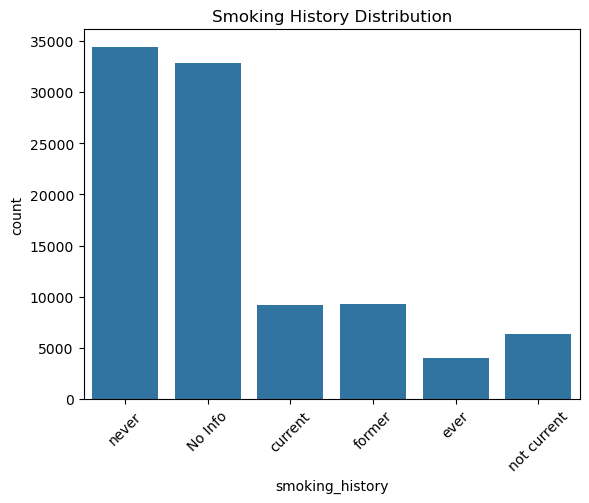

In [10]:
sns.countplot(x='smoking_history', data=df)
plt.title("Smoking History Distribution")
plt.xticks(rotation=45)
plt.show()

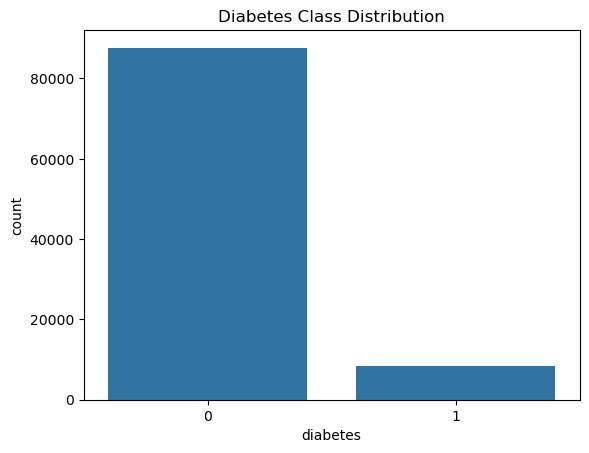

In [11]:
sns.countplot(x='diabetes', data=df)
plt.title("Diabetes Class Distribution")
plt.show()

In [12]:
df['diabetes'].value_counts(normalize=True) * 100

diabetes
0    91.178
1     8.822
Name: proportion, dtype: float64

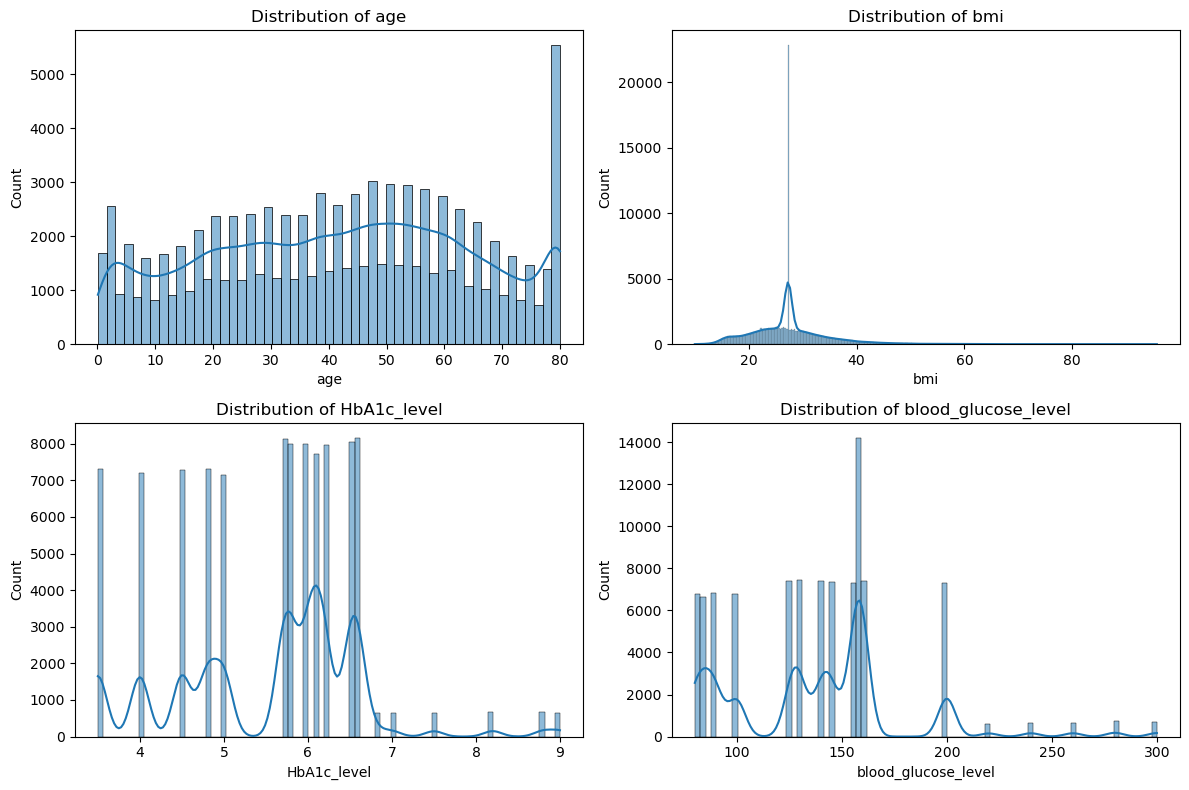

In [13]:
features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [14]:
def categorize_bmi(value):
    if value < 18.5:
        return 'Underweight'
    elif 18.5 <= value < 25:
        return 'Normal'
    elif 25 <= value < 30:
        return 'Overweight'
    else:
        return 'Obese'
        
df['bmi_category'] = df['bmi'].apply(categorize_bmi)

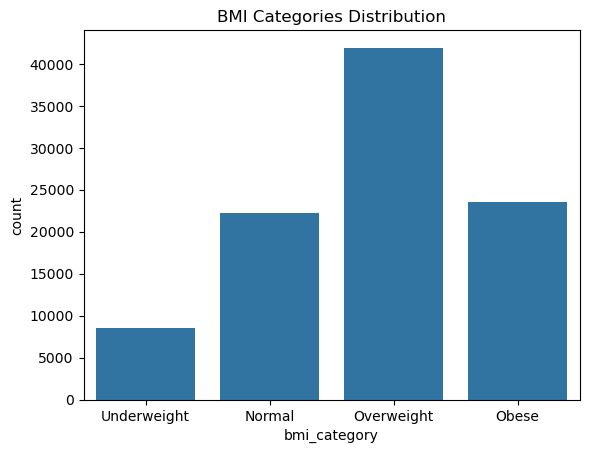

In [15]:
sns.countplot(x='bmi_category', data=df, order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title("BMI Categories Distribution")
plt.show()

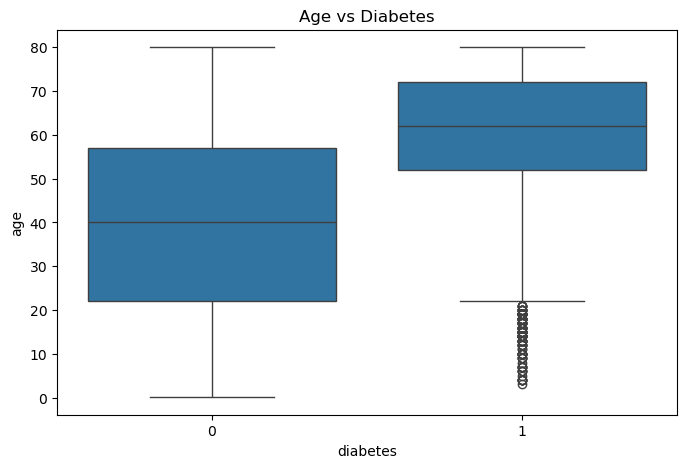

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='diabetes', y='age', data=df)
plt.title("Age vs Diabetes")
plt.show()

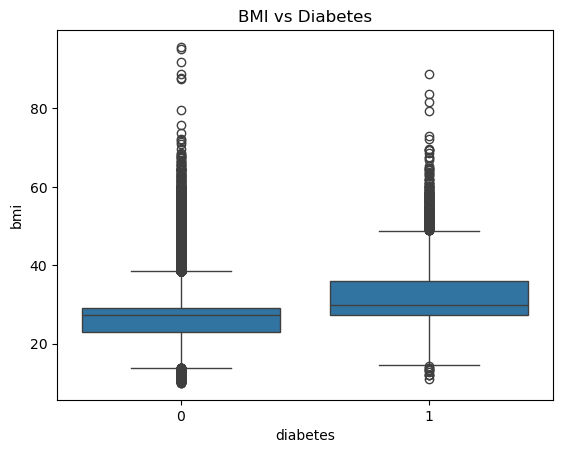

In [17]:
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title("BMI vs Diabetes")
plt.show()

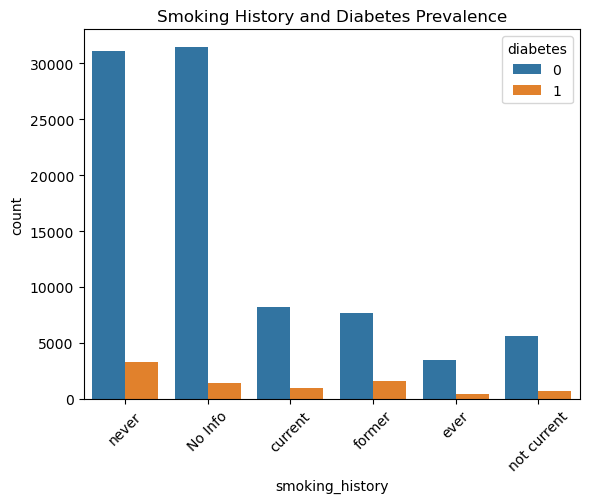

In [18]:
sns.countplot(x='smoking_history', hue='diabetes', data=df)
plt.title("Smoking History and Diabetes Prevalence")
plt.xticks(rotation=45)
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_cols = ['gender', 'smoking_history']
encoder = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])
df_encoded.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category
0,0,80.0,0,1,4,25.19,6.6,140,0,Overweight
1,0,54.0,0,0,0,27.32,6.6,80,0,Overweight
2,1,28.0,0,0,4,27.32,5.7,158,0,Overweight
3,0,36.0,0,0,1,23.45,5.0,155,0,Normal
4,1,76.0,1,1,1,20.14,4.8,155,0,Normal


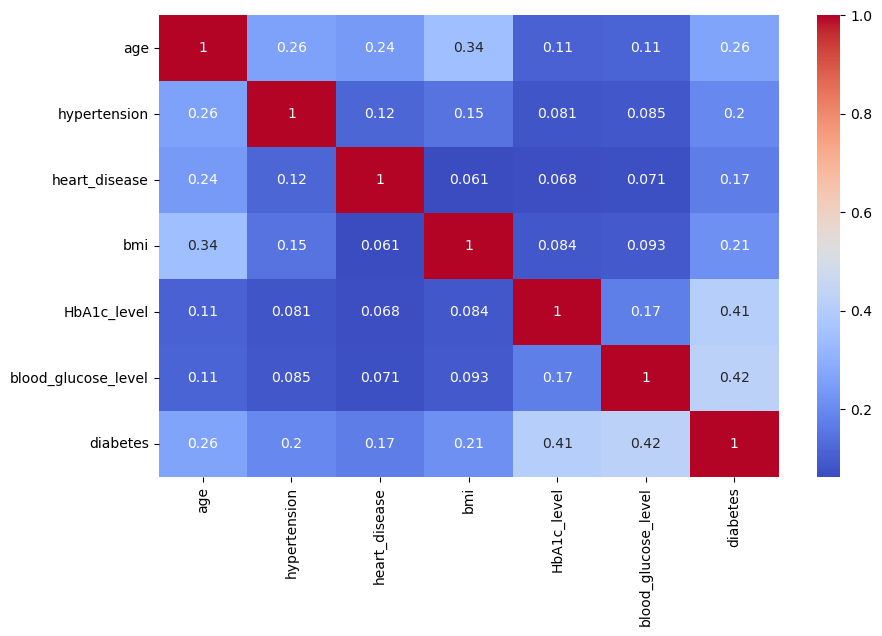

In [20]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])  
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

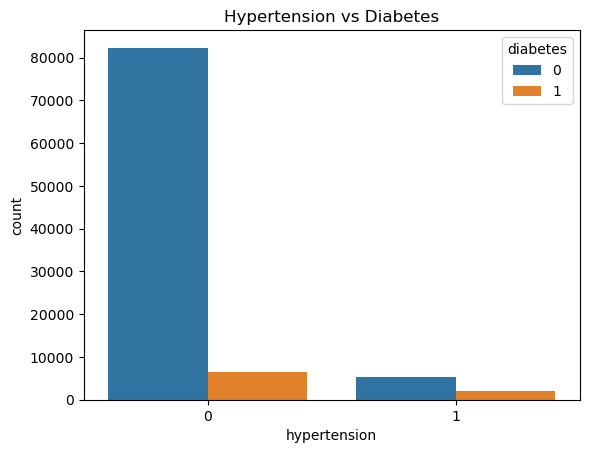

In [21]:
sns.countplot(x='hypertension', hue='diabetes', data=df)
plt.title("Hypertension vs Diabetes")
plt.show()

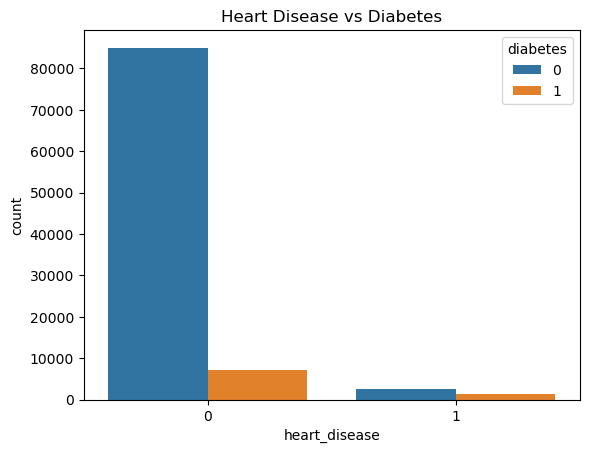

In [22]:
sns.countplot(x='heart_disease', hue='diabetes', data=df)
plt.title("Heart Disease vs Diabetes")
plt.show()

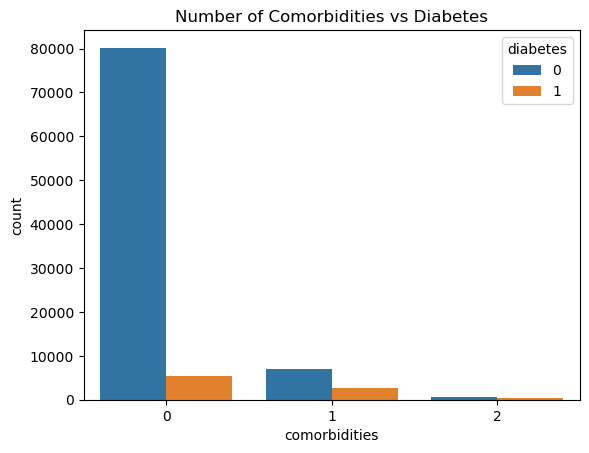

In [23]:
df['comorbidities'] = df['hypertension'] + df['heart_disease']
sns.countplot(x='comorbidities', hue='diabetes', data=df)
plt.title("Number of Comorbidities vs Diabetes")
plt.show()

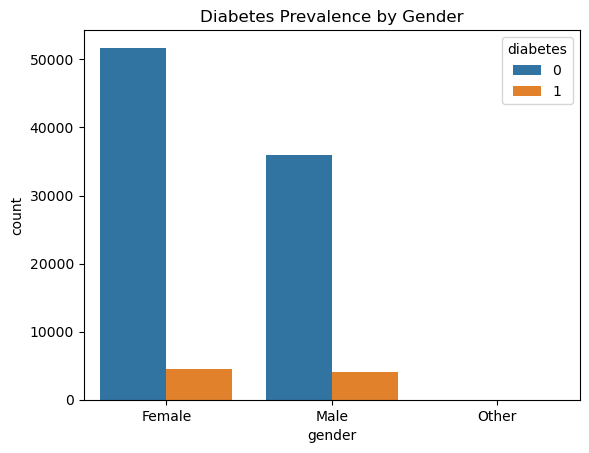

In [24]:
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title("Diabetes Prevalence by Gender")
plt.show()

In [25]:
print(df[df['bmi'] > 50])
print(df[df['blood_glucose_level'] > 300])

       gender   age  hypertension  heart_disease smoking_history    bmi  \
11     Female  54.0             0              0          former  54.70   
39     Female  34.0             0              0           never  56.43   
59     Female  67.0             0              0           never  63.48   
93       Male  38.0             0              0           never  55.61   
98     Female  30.0             0              0         No Info  50.13   
...       ...   ...           ...            ...             ...    ...   
99650  Female  55.0             0              0           never  52.97   
99770  Female  52.0             0              0         current  59.45   
99793  Female  72.0             1              0           never  50.85   
99844  Female  39.0             0              0          former  59.42   
99953  Female  59.0             1              0            ever  60.52   

       HbA1c_level  blood_glucose_level  diabetes bmi_category  comorbidities  
11             6.0 

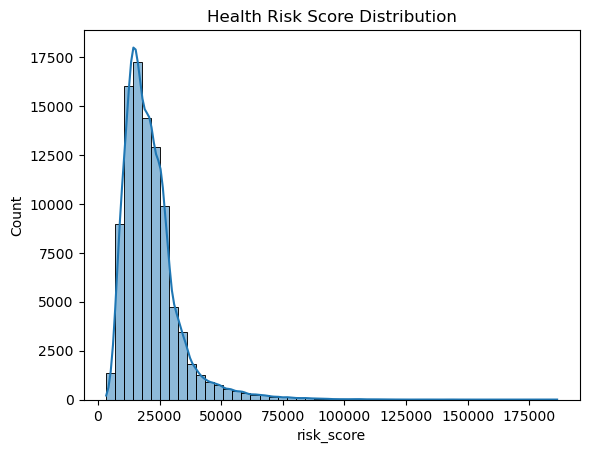

In [26]:
df['risk_score'] = df['bmi'] * df['HbA1c_level'] * df['blood_glucose_level']
sns.histplot(df['risk_score'], bins=50, kde=True)
plt.title("Health Risk Score Distribution")
plt.show()

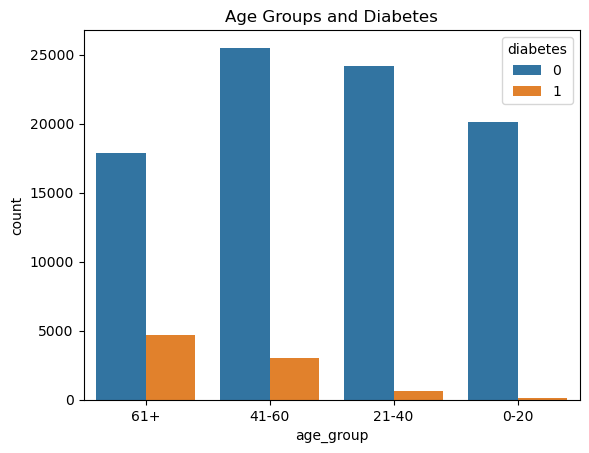

In [27]:
def categorize_age(value):
    if value <= 20:
        return '0-20'
    elif 21 <= value <= 40:
        return '21-40'
    elif 41 <= value <= 60:
        return '41-60'
    else:
        return '61+'

df['age_group'] = df['age'].apply(categorize_age)
sns.countplot(x='age_group', hue='diabetes', data=df)
plt.title("Age Groups and Diabetes")
plt.show()

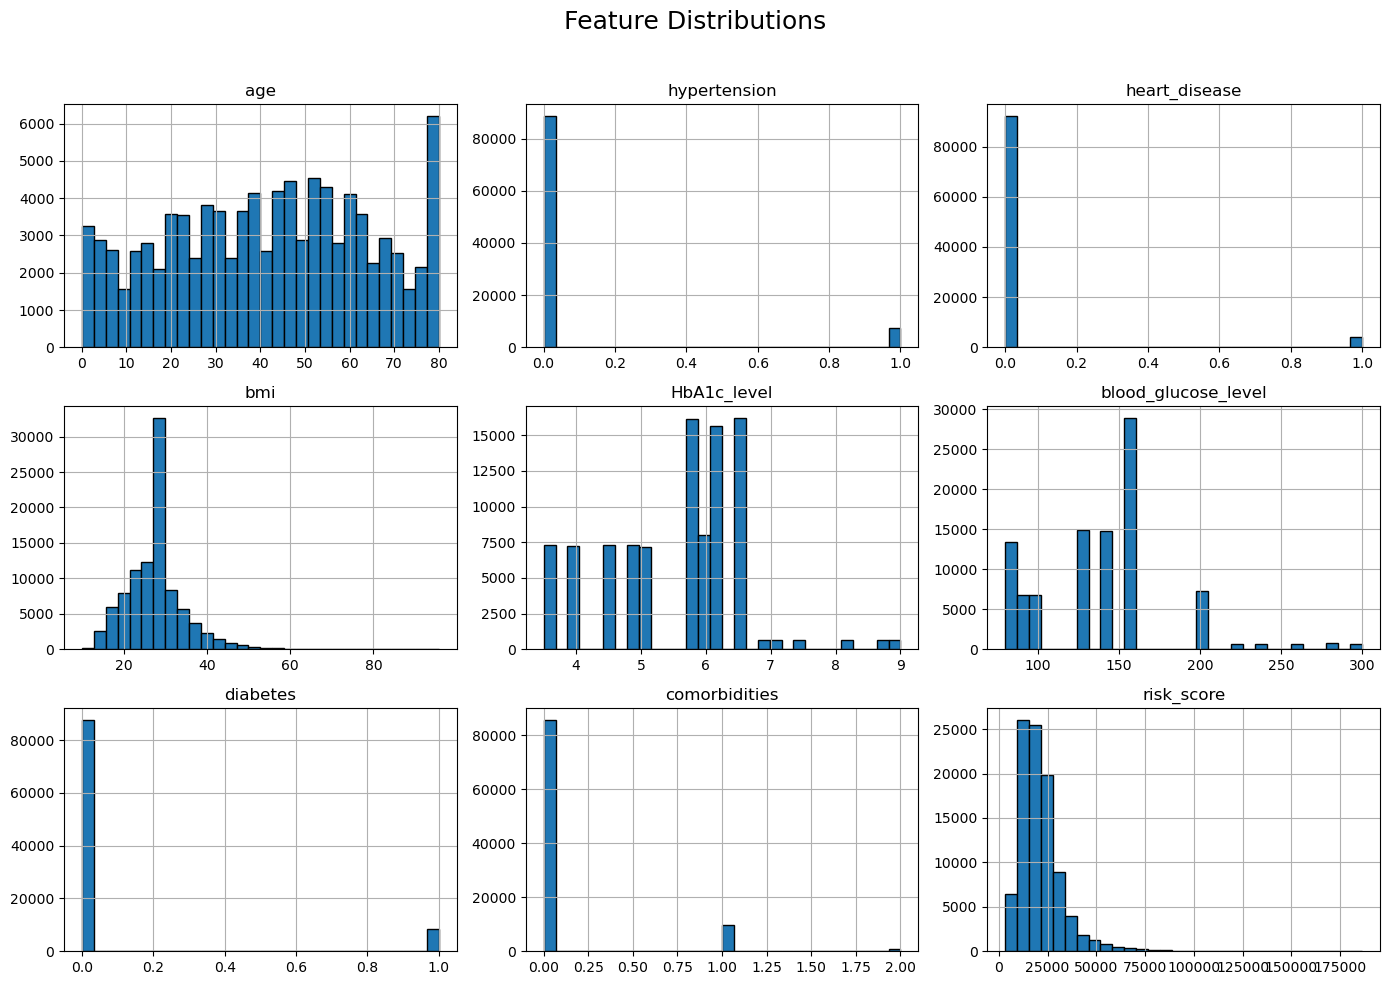

In [28]:
df.hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [29]:
from math import pi

grouped_data = df.groupby('diabetes')[['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']].mean()
grouped_data = grouped_data / grouped_data.max()

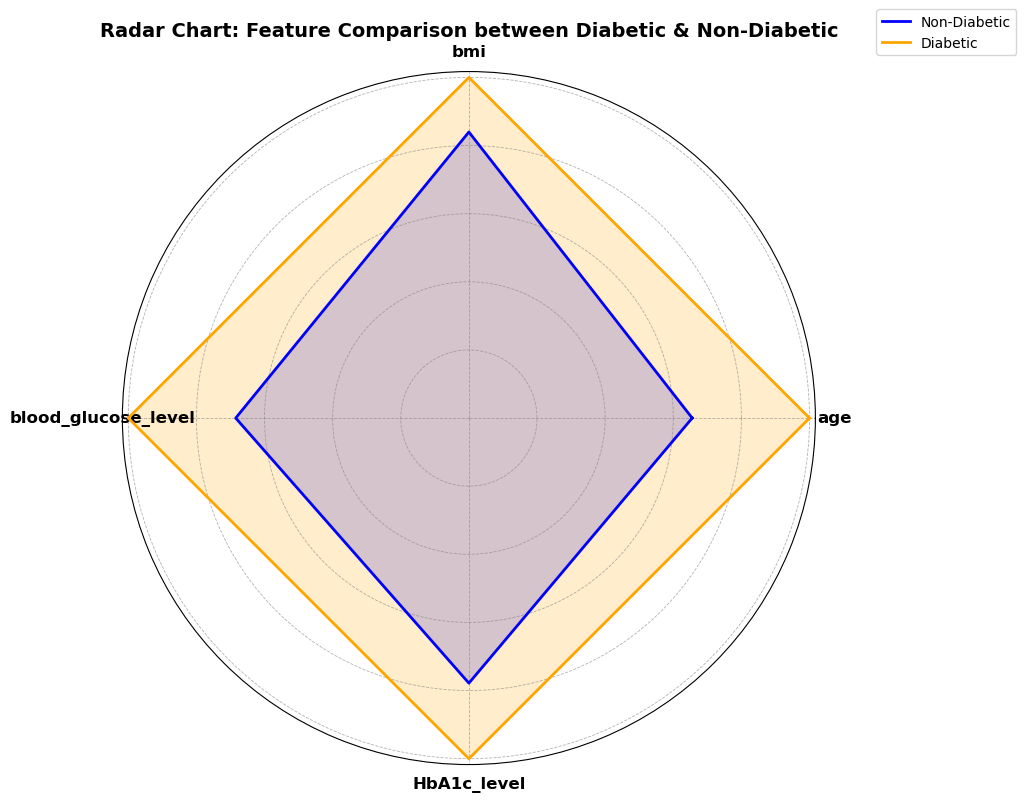

In [30]:
categories = list(grouped_data.columns)
num_vars = len(categories)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

colors = ['blue', 'orange']

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

def add_to_radar(values, label, color):
    values += values[:1]  # Close the circle
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=label, color=color)
    ax.fill(angles, values, alpha=0.2, color=color)

add_to_radar(grouped_data.iloc[0].tolist(), 'Non-Diabetic', colors[0])
add_to_radar(grouped_data.iloc[1].tolist(), 'Diabetic', colors[1])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')
ax.set_yticklabels([]) 
ax.grid(color="gray", linestyle="dashed", linewidth=0.6, alpha=0.6)

plt.title("Radar Chart: Feature Comparison between Diabetic & Non-Diabetic", fontsize=14, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

# Preprocessing

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [33]:
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [35]:
nominal_features = ["gender", "smoking_history", "comorbidities"]  
ordinal_features = ["bmi_category", "age_group"]  
numeric_features = ["age", "hypertension", "heart_disease", "bmi", "HbA1c_level", "blood_glucose_level", "risk_score"]

In [36]:
nominal_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [37]:
ordinal_encoder = OrdinalEncoder(categories=[
    ["Underweight", "Normal", "Overweight", "Obese"],
    ["0-20", "21-40", "41-60", "61+"]])

In [38]:
numeric_scaler = StandardScaler()

In [39]:
transformer = ColumnTransformer([
    ("nominal", nominal_encoder, nominal_features),
    ("ordinal", ordinal_encoder, ordinal_features),
    ("numeric", numeric_scaler, numeric_features)])

In [40]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [41]:
X_train_preprocessed.dtype

dtype('float64')

In [42]:
X_train_df = pd.DataFrame(X_train_preprocessed, columns=transformer.get_feature_names_out(), index=X_train.index)
X_test_df = pd.DataFrame(X_test_preprocessed, columns=transformer.get_feature_names_out(), index=X_test.index)

train_df = pd.concat([X_train_df, y_train], axis=1)
test_df = pd.concat([X_test_df, y_test], axis=1)

final_df = pd.concat([train_df, test_df])

In [43]:
final_df.columns

Index(['nominal__gender_Male', 'nominal__gender_Other',
       'nominal__smoking_history_current', 'nominal__smoking_history_ever',
       'nominal__smoking_history_former', 'nominal__smoking_history_never',
       'nominal__smoking_history_not current', 'nominal__comorbidities_1',
       'nominal__comorbidities_2', 'ordinal__bmi_category',
       'ordinal__age_group', 'numeric__age', 'numeric__hypertension',
       'numeric__heart_disease', 'numeric__bmi', 'numeric__HbA1c_level',
       'numeric__blood_glucose_level', 'numeric__risk_score', 'diabetes'],
      dtype='object')

In [44]:
final_df.head()

,nominal__gender_Male,nominal__gender_Other,nominal__smoking_history_current,nominal__smoking_history_ever,nominal__smoking_history_former,nominal__smoking_history_never,nominal__smoking_history_not current,nominal__comorbidities_1,nominal__comorbidities_2,ordinal__bmi_category,ordinal__age_group,numeric__age,numeric__hypertension,numeric__heart_disease,numeric__bmi,numeric__HbA1c_level,numeric__blood_glucose_level,numeric__risk_score,diabetes
18190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,0.904862,3.443843,-0.205343,0.598700,0.437825,0.509663,0.751518,1
97664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.127555,-0.290373,-0.205343,0.002345,-0.960697,-0.297776,-0.511098,0
48582,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,1.083016,-0.290373,-0.205343,0.002345,-1.893046,0.485195,-0.544594,0
50019,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,0.993939,-0.290373,-0.205343,0.567624,0.437825,0.509663,0.733973,0
87126,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,-0.698525,-0.290373,-0.205343,0.927212,-0.960697,-1.423296,-0.809314,0


In [45]:
final_df.dtypes

nominal__gender_Male                    float64
nominal__gender_Other                   float64
nominal__smoking_history_current        float64
nominal__smoking_history_ever           float64
nominal__smoking_history_former         float64
nominal__smoking_history_never          float64
nominal__smoking_history_not current    float64
nominal__comorbidities_1                float64
nominal__comorbidities_2                float64
ordinal__bmi_category                   float64
ordinal__age_group                      float64
numeric__age                            float64
numeric__hypertension                   float64
numeric__heart_disease                  float64
numeric__bmi                            float64
numeric__HbA1c_level                    float64
numeric__blood_glucose_level            float64
numeric__risk_score                     float64
diabetes                                  int64
dtype: object